In [ ]:
# Import Libraries
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data
car = pd.read_csv('/content/drive/MyDrive/Data Latihan/car_details.csv', index_col=0)
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car.tail()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4340 entries, Maruti 800 AC to Renault KWID RXT
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 271.2+ KB


In [ ]:
car.shape

(4340, 7)

In [ ]:
#Data Numerikal

num_cols = car._get_numeric_data().columns
car_numeric = car[num_cols]
car_numeric.head()

,year,selling_price,km_driven
name,,,
Maruti 800 AC,2007,60000,70000
Maruti Wagon R LXI Minor,2007,135000,50000
Hyundai Verna 1.6 SX,2012,600000,100000
Datsun RediGO T Option,2017,250000,46000
Honda Amaze VX i-DTEC,2014,450000,141000


In [ ]:
car_numeric.to_csv('car_numeric.csv')

In [ ]:
car_numeric

,year,selling_price,km_driven
name,,,
Maruti 800 AC,2007,60000,70000
Maruti Wagon R LXI Minor,2007,135000,50000
Hyundai Verna 1.6 SX,2012,600000,100000
Datsun RediGO T Option,2017,250000,46000
Honda Amaze VX i-DTEC,2014,450000,141000
...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000
Hyundai i20 Magna 1.4 CRDi,2014,409999,80000
Maruti 800 AC BSIII,2009,110000,83000


In [ ]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
from sklearn.preprocessing import normalize
data_normal = normalize(X=car_numeric, norm="l2", axis=1)

In [ ]:
data_normal = pd.DataFrame(data_normal, columns=car_numeric.columns)
data_normal

,year,selling_price,km_driven
0,0.021764,0.650637,0.759077
1,0.013940,0.937658,0.347281
2,0.003308,0.986389,0.164398
3,0.007935,0.983459,0.180956
4,0.004271,0.954245,0.298997
...,...,...,...
4335,0.004821,0.981479,0.191509
4336,0.004821,0.981479,0.191509
4337,0.014577,0.798170,0.602256
4338,0.002318,0.994628,0.103487


In [ ]:
data_normal.describe()

,year,selling_price,km_driven
count,4340.000000,4340.000000,4340.000000
mean,0.006956,0.937615,0.240115
std,0.005318,0.110298,0.225822
min,0.000227,0.242531,0.000004
25%,0.003324,0.934422,0.064166
50%,0.005437,0.986381,0.164395
75%,0.008910,0.997934,0.355981
max,0.062503,1.000000,0.970122


In [ ]:
from sklearn import preprocessing

preprocessor = preprocessing.MinMaxScaler(feature_range=(0, 1))
preprocessor.fit(car_numeric)
scaled_data = preprocessor.transform(car_numeric)
scaled_data

array([[0.53571429, 0.0045045 , 0.08678301],
       [0.53571429, 0.01295045, 0.06198751],
       [0.71428571, 0.06531532, 0.12397626],
       ...,
       [0.60714286, 0.01013514, 0.10290008],
       [0.85714286, 0.09515766, 0.11157851],
       [0.85714286, 0.02308559, 0.04958976]])

In [ ]:
scaled_data = preprocessor.fit_transform(car_numeric)
scaled_data

array([[0.53571429, 0.0045045 , 0.08678301],
       [0.53571429, 0.01295045, 0.06198751],
       [0.71428571, 0.06531532, 0.12397626],
       ...,
       [0.60714286, 0.01013514, 0.10290008],
       [0.85714286, 0.09515766, 0.11157851],
       [0.85714286, 0.02308559, 0.04958976]])

In [ ]:
#Data Kategorikal

car_categorical = car.drop(num_cols, axis=1)
car_categorical.head()

,fuel,seller_type,transmission,owner
name,,,,
Maruti 800 AC,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


In [ ]:
car_categorical.to_csv('car_categorical.csv')

#**Encoding Categorical Data**

In [ ]:
car

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
car['fuel'] = label_encoder.fit_transform(car['fuel'])
car

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Maruti 800 AC,2007,60000,70000,4,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,135000,50000,4,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,Manual,First Owner
Datsun RediGO T Option,2017,250000,46000,4,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Individual,Manual,Second Owner
Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Individual,Manual,Second Owner
Maruti 800 AC BSIII,2009,110000,83000,4,Individual,Manual,Second Owner


In [ ]:
label_encoder.classes_

array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)

Data fuel setelah dilakukan encoding berubah menjadi numerical. Acuan penggantian data menjadi numerical bisa dilihat pada label_encoder.classes_ yang dimana **"CNG = 0, Diesel = 1, Electric = 2, LPG = 3, dan Petrol = 4"**

In [ ]:
car_categorical['fuel'].value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


#**Membuat Visualisasi**

In [ ]:
car_categorical = pd.read_csv('car_categorical.csv', index_col=0)
car_numerical = pd.read_csv('car_numeric.csv', index_col=0)

In [ ]:
import numpy as np

print('number of nonzero values:', np.sum(car_numerical['year'] !=0))
print('number of zero values:', np.sum(car_numerical['year'] ==0))

number of nonzero values: 4340
number of zero values: 0


In [ ]:
print('number of nonzero values:', np.sum(car_numerical['selling_price'] !=0))
print('number of zero values:', np.sum(car_numerical['selling_price'] ==0))

number of nonzero values: 4340
number of zero values: 0


Text(0, 0.5, 'selling_price')

<Figure size 640x480 with 0 Axes>

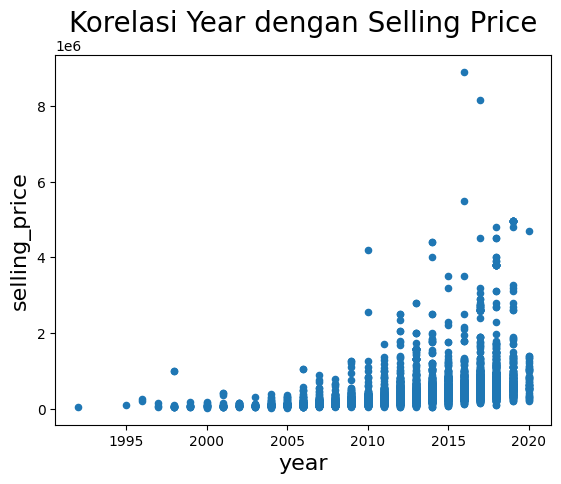

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
car.plot(x='year', y='selling_price', kind='scatter')
plt.title('Korelasi Year dengan Selling Price', fontsize=20)
plt.xlabel('year', fontsize=16)
plt.ylabel('selling_price', fontsize=16)

* Hubungan antara tahun keluaran mobil dan harga jual mobil bekas memiliki korelasi positif. Semakin meningkatnya mobil keluaran tahun terbaru, maka secara linier harga mobil pun meningkat. Namun untuk nilai mobil keluaran terbaru dengan nilai tertentu itu variatif.

#**Supervised Learning**

In [ ]:
X = car['year']
X.head()

,year
name,
Maruti 800 AC,2007
Maruti Wagon R LXI Minor,2007
Hyundai Verna 1.6 SX,2012
Datsun RediGO T Option,2017
Honda Amaze VX i-DTEC,2014


In [ ]:
Y = car['selling_price']
Y.head()

,selling_price
name,
Maruti 800 AC,60000
Maruti Wagon R LXI Minor,135000
Hyundai Verna 1.6 SX,600000
Datsun RediGO T Option,250000
Honda Amaze VX i-DTEC,450000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0000)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3038,)
(3038,)
(1302,)
(1302,)


In [ ]:
import numpy as np

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3038, 1)
(3038,)
(1302, 1)
(1302,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)
print(lr.coef_)

-111199583.91744867
[55487.67585252]


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
Y_test.shape

(1302,)

Text(0, 0.5, 'index')

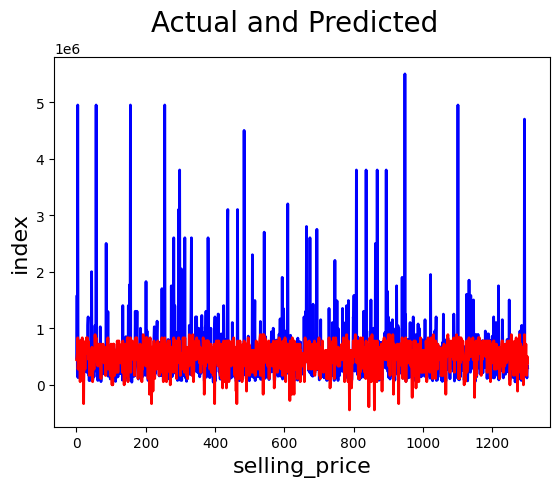

In [ ]:
import matplotlib.pyplot as plt
c = [i for i in range(1, 1303, 1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('selling_price', fontsize=16)
plt.ylabel('index', fontsize=16)

Text(0, 0.5, 'index')

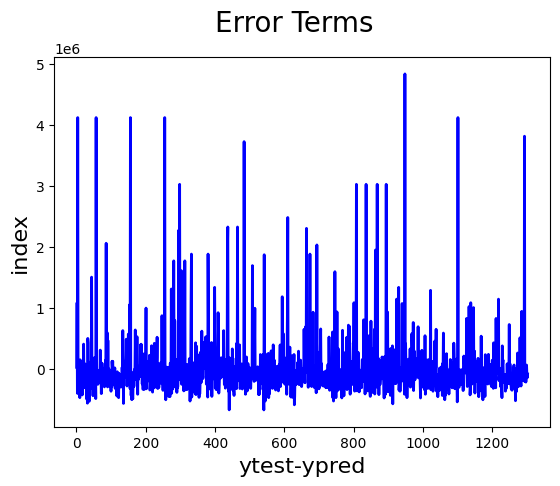

In [ ]:
c = [i for i in range(1, 1303, 1)]
fig = plt.figure()
plt.plot(c,Y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('ytest-ypred', fontsize=16)
plt.ylabel('index', fontsize=16)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)

In [ ]:
r_squared = r2_score(Y_test, y_pred)

In [ ]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :' ,r_squared)

Mean_Squared_Error : 278941854885.0688
r_square_value : 0.18189346353809488


#Analisisnya:

Hasil MSE nya 2278941854885.0688 adalah error dari suatu modelnya, dan r_square value secara akurat sebesar 18.02% dari test datanya.

**Dapat disimpulkan bahwa tingkat pengaruh pada dataset yang digunakan yaitu 18.02%**
